# Polynomial Approximation (based on Taylor series) 

### Imports

Place all imports for this file here

In [2]:
import matplotlib.pyplot as plt
import numpy as np


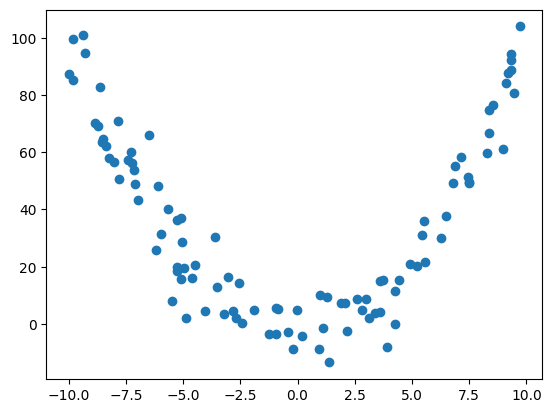

In [3]:
# generate synthetic data following x^2

np.random.seed(13)# reproducible results

def generate_data_x2(size_of_dataset:int, range_of_inputs:list=[-3, 5], scale_of_noise:float=3) -> tuple([np.array, np.array]):
    """ Generate synthetic data following x^2"""
    x = np.random.rand(size_of_dataset) * (range_of_inputs[1] - range_of_inputs[0]) + range_of_inputs[0] # generate random x values
    y = x**2 + np.random.randn(size_of_dataset) * scale_of_noise # noise spreads out the data and makes it look realistic
    return x, y

x, y = generate_data_x2(100, [-10, 10], 10)

plt.scatter(x, y)
plt.show()

our point is: 3.0
Is our point in the dataset? False
Our closest point 3.0026103602626684
[3.00261036 3.12910669 2.8322669  3.3881228  2.59657998]
The next value on the other side 2.832266895181384
Secant slope to estimate the derivative:  22.813064828324666
Estimate for y: 8.699661198297903


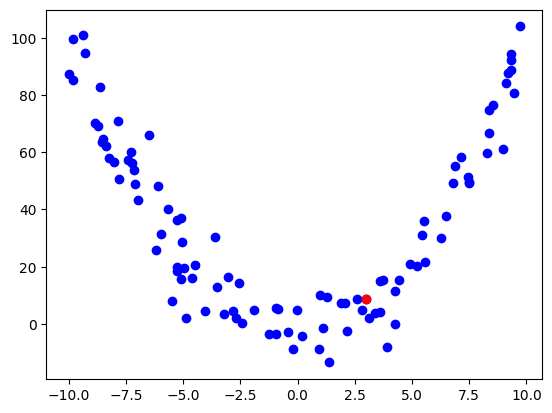

In [4]:
# ------- Pick a point to approximate that is not in your dataset -- look at the values in x ------- 
x_approx = 3.000
print("our point is:", x_approx)
print("Is our point in the dataset?", x_approx in x) # False if not in our dataset

# ------- Find the two closes values in x to the point you want to approximate ------- 
# [:2] is a slice that takes the first two values of the sorted array
x_closest = x[np.argsort(np.abs(x - x_approx))[:1]][0] # sort the x values by their distance to x_approx and take the closest
print("Our closest point", x_closest) # this is below. 

x_sorted_by_closeness = x[np.argsort(np.abs(x - x_approx))]
print(x_sorted_by_closeness[:5]) # the five closest values to x_approx
x_next = x_sorted_by_closeness[2] # <---- DONE BY HAND! UH OH! 
print("The next value on the other side", x_next) # this is below.

# ------- Estimate the derivative at that point using the two closest points ------- 
secant_slope = (y[np.where(x == x_next)][0] - y[np.where(x == x_closest)][0]) / (x_next - x_closest) # rise over run
print("Secant slope to estimate the derivative: ", secant_slope) # this is below.

# Construct an approximation of the function at that point using the derivative
y_estimate = secant_slope * (x_approx - x_closest) + y[np.where(x == x_closest)][0] # y = mx + b
print("Estimate for y:", y_estimate) # this is below.

# Plot the approximation
plt.scatter(x, y, color='blue') # plot the approximated values in blue
plt.scatter(x_closest, y[np.where(x == x_closest)], color='red') # plot the closest point in red
plt.show()

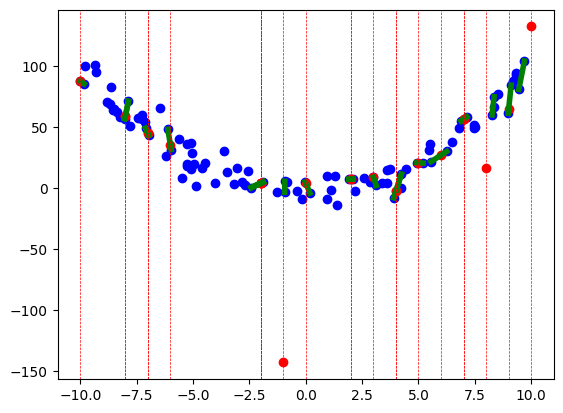

In [5]:
from random import randint

def approximate_value(x, y, x_approx):
    """ Approximate the value of a function at a point x_approx given the dataset x, y; using the two closest"""
    
    x_closest = x[np.argsort(np.abs(x - x_approx))[:1]][0] # sort the x values by their distance to x_approx and take the closest
    x_next = x[np.argsort(np.abs(x - x_approx))[:2]][1] # NOT NECESSARILY ON THE OTHER SIDE!!!
    linear_approximations = [[x_closest, y[np.where(x == x_closest)][0]], [x_next, y[np.where(x == x_next)][0]]] # store the two closest points
    secant_slope = (y[np.where(x == x_next)][0] - y[np.where(x == x_closest)][0]) / (x_next - x_closest) 
    y_estimate = secant_slope * (x_approx - x_closest) + y[np.where(x == x_closest)][0] # y = mx + b
    return y_estimate, linear_approximations

# generate some values based on approximate_value
x_to_approximate = [randint(-10, 10) for i in range(25)]
y_information = [approximate_value(x, y, x_approx) for x_approx in x_to_approximate]
y_approximated = [y_info[0] for y_info in y_information] # store the approximated values
linear_approximations = [y_info[1] for y_info in y_information] # the corresponding list of the two points used for the approximation

# graph the thick lines in linear_approximations
for linear_approximation in linear_approximations:
    plt.plot([linear_approximation[0][0], linear_approximation[1][0]], [linear_approximation[0][1], linear_approximation[1][1]], color='green', linewidth=4) # plot the line between the two points

# draw dashed vertical lines at x_to_approximate
for x_approx in x_to_approximate:
    plt.axvline(x=x_approx, color='red', linestyle='--', linewidth=0.5)
# plot the approximated values
plt.scatter(x, y, color='blue') # plot the approximated values in blue
plt.scatter(x_to_approximate, y_approximated, color='red') # plot the approximated values in red
plt.show()


If you only do two closest, you don't get a great approximation for the cases when the two closest are on one side of the target value of x. 

Let's fix this! But also ask yourself, is it realistic to expect this to always be the case? 

In [6]:
# steps to fix the function! 

x_approx = 3 # point to approximate

x_positive = np.sort(x[np.where(x - x_approx > 0)])
print(x_positive)
x_closest_positive = x_positive[0]
print(x_closest_positive) # works 

x_negative = np.sort(x[np.where(x - x_approx < 0)])
print(x_negative)
x_closest_negative = x_negative[-1] # last one 
print(x_closest_negative)

# Estimate the derivative at that point using the two closest points
secant_slope = (y[np.where(x == x_closest_positive)][0] - y[np.where(x == x_closest_negative)][0]) / (x_closest_positive - x_closest_negative) # rise over run

# approximated y-value
y_approximated = secant_slope * (x_approx - x_closest_negative) + y[np.where(x == x_closest_negative)][0] # y = mx + b
print("Estimate for y:", y_approximated) # this is below.

[3.00261036 3.12910669 3.3881228  3.59695903 3.60210031 3.72170158
 3.90890905 4.24048748 4.24465356 4.44036459 4.93154474 5.21135354
 5.44757519 5.51053029 5.55404821 6.25682342 6.48557065 6.79417021
 6.89117066 7.14121885 7.44863725 7.47626887 7.49573003 8.26425614
 8.35544772 8.37103496 8.51988959 8.98188363 9.1114829  9.17869464
 9.31498396 9.32924083 9.34506217 9.45202228 9.69876915]
3.0026103602626684
[-9.99975933 -9.82568535 -9.8117446  -9.36192667 -9.29926952 -8.82975016
 -8.69830926 -8.64165006 -8.54525578 -8.48565108 -8.3619988  -8.2349292
 -8.02493562 -7.86440012 -7.81390184 -7.42083851 -7.27283296 -7.24027894
 -7.13947846 -7.10258022 -6.96426675 -6.48540274 -6.18159883 -6.1140503
 -5.9673185  -5.64201982 -5.46824246 -5.2723968  -5.2491756  -5.24682156
 -5.11048596 -5.08881789 -5.06042598 -4.94014634 -4.87440101 -4.61230609
 -4.46007287 -4.03101058 -3.61217267 -3.508359   -3.19478394 -3.0483757
 -2.83332435 -2.70168078 -2.54291944 -2.41333417 -1.89361015 -1.25763975
 -0.9352

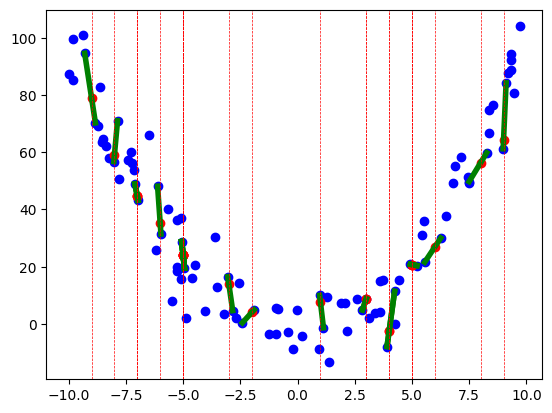

In [9]:
# Define the function flanked_linear_approximation() 
def flanked_linear_approximation(x, y, x_approx): # update with type hints and add a doc string. 
    # compute the approximations according to the work in the previous cell 
    x_positive = np.sort(x[np.where(x - x_approx > 0)])
    x_negative = np.sort(x[np.where(x - x_approx < 0)])
    
    if len(x_positive) == 0 or len(x_negative) == 0:
        raise ValueError(f"No valid points found for approximation at x_approx = {x_approx}")
    
    x_closest_positive = x_positive[0]
    x_closest_negative = x_negative[-1]
    secant_slope = (y[np.where(x == x_closest_positive)][0] - y[np.where(x == x_closest_negative)][0]) / (x_closest_positive - x_closest_negative)
    y_approximated = secant_slope * (x_approx - x_closest_negative) + y[np.where(x == x_closest_negative)][0]

    # return it
    return y_approximated, [[x_closest_negative, y[np.where(x == x_closest_negative)][0]], [x_closest_positive, y[np.where(x == x_closest_positive)][0]]]

# generate random value to approximate
x_to_approximate = [randint(int(min(x)), int(max(x))) for i in range(25)]
y_information = [flanked_linear_approximation(x, y, x_approx) for x_approx in x_to_approximate]
y_approximated = [y_info[0] for y_info in y_information]
linear_approximations = [y_info[1] for y_info in y_information]


# approximate them 
for linear_approximation in linear_approximations:
    plt.plot([linear_approximation[0][0], linear_approximation[1][0]], [linear_approximation[0][1], linear_approximation[1][1]], color='green', linewidth=4) # plot the line between the two points

# visualize the results. 
for x_approx in x_to_approximate:
    plt.axvline(x=x_approx, color='red', linestyle='--', linewidth=0.5)
plt.scatter(x, y, color='blue') # plot the approximated values in blue
plt.scatter(x_to_approximate, y_approximated, color='red') # plot the approximated values in red
plt.show()
